In [5]:
import sys
import os
import pandas as pd
from pprint import pprint
wd = %pwd
parent = os.path.dirname(wd)
fdel = os.path.sep
sys.path.append(parent+fdel+"src")
from tedata import TE_Scraper, base
from tedata.utils import extract_and_convert_value, convert_metric_prefix, ready_datestr

In [25]:
base.find_active_drivers(quit_all=True)

INFO - Quitting 2 active webdriver instances...


[]

In [26]:
# Test the scaling plot
url = 'https://tradingeconomics.com/united-states/balance-of-trade'
scr = TE_Scraper(use_existing_driver = False, headless = False)  ## Initialize a new TE_scraper object.
scr.load_page(url, extra_wait_time=3) 
scr.scrape_metadata() ## Scrape the metadata for the data series from the page.

INFO - New firefox webdriver created.
INFO - Chart types dictionary created successfully: dict_keys(['Column', 'Spline', 'Areaspline', 'Stepline', 'Line', 'Area'])
INFO - Date span set to: 1Y
INFO - 
Series metadata: 
 {'units': 'USD Billion', 'original_source': 'Bureau of Economic Analysis (BEA)', 'title': 'United States Balance of Trade', 'indicator': 'balance of trade', 'country': 'united states', 'source': 'Trading Economics', 'id': 'united-states/balance-of-trade'}


In [9]:
scr.set_chartType_js("Spline")
scr.init_tooltipScraper()
datapoints = scr.tooltip_scraper.latest_points_js(num_points=10)

# Convert metric prefixes for the values in each datapoint
for point in datapoints:
    point["value"] = extract_and_convert_value(point["value"])[0]
    point["date"] = ready_datestr(point["date"])
latest_dates = [point["date"] for point in datapoints]
print("Latest dates: ", latest_dates)

## Get the frequency of the time series
date_series = pd.Series(latest_dates[::-1]).astype("datetime64[ns]")
print(pd.infer_freq(date_series))

INFO - Chart type set to: Spline (using JavaScript)
INFO - TooltipScraper object initialised successfully.
INFO - Chart type set to: Spline
INFO - Time taken to select chart type: 2.549072100315243
INFO - Time taken to execute JS code: 2.9368731998838484


Latest dates:  ['Jan 2025', 'Dec 2024', 'Nov 2024', 'Oct 2024', 'Sep 2024', 'Aug 2024', 'Jul 2024', 'Jun 2024', 'May 2024', 'Apr 2024']
MS


In [23]:
scr.set_max_date_span_viaCalendar()

In [24]:
scr.tooltip_scraper.first_last_dates_js()
scr.tooltip_scraper.first_last_dates_js()

INFO - JS Log: Starting first/last date extraction using plot border targeting
INFO - JS Log: Plot border attributes: x=25, y=40, width=664, height=295
INFO - JS Log: Calculated positions: leftX=100, rightX=764, centerY=420.5
INFO - JS Log: Starting progressive search for left tooltip position
INFO - JS Log: Trying left position with offset: 0px
INFO - JS Log: Moved cursor to left position: x=100, y=420.5
INFO - JS Log: No date element found at left position
INFO - JS Log: Trying left position with offset: 1px
INFO - JS Log: Moved cursor to left position: x=101, y=420.5
INFO - JS Log: Found date element at left: Feb 1950
INFO - JS Log: Found value element at left: 0.186 USD Billion
INFO - JS Log: Starting progressive search for right tooltip position
INFO - JS Log: Trying right position with offset: 0px
INFO - JS Log: Moved cursor to right position: x=764, y=420.5
INFO - JS Log: Found date element at right: Jan 2025
INFO - JS Log: Found value element at right: -131.38 USD Billion
INFO 

Raw result from JavaScript: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Plot border attributes: x=25, y=40, width=664, height=295', 'Calculated positions: leftX=100, rightX=764, centerY=420.5', 'Starting progressive search for left tooltip position', 'Trying left position with offset: 0px', 'Moved cursor to left position: x=100, y=420.5', 'No date element found at left position', 'Trying left position with offset: 1px', 'Moved cursor to left position: x=101, y=420.5', 'Found date element at left: Feb 1950', 'Found value element at left: 0.186 USD Billion', 'Starting progressive search for right tooltip position', 'Trying right position with offset: 0px', 'Moved cursor to right position: x=764, y=420.5', 'Found date element at right: Jan 2025', 'Found value element at right: -131.38 USD Billion', 'Extraction complete']}, 'end_date': 'Jan 2025', 'end_value': -131.38, 'start_date': 'Feb 1950', 'start_value': 0.186, 'unit_str': 'USD Billion'}
Con

INFO - JS Log: Starting first/last date extraction using plot border targeting
INFO - JS Log: Plot border attributes: x=25, y=40, width=664, height=295
INFO - JS Log: Calculated positions: leftX=100, rightX=764, centerY=420.5
INFO - JS Log: Starting progressive search for left tooltip position
INFO - JS Log: Trying left position with offset: 0px
INFO - JS Log: Moved cursor to left position: x=100, y=420.5
INFO - JS Log: Found date element at left: Jan 1950
INFO - JS Log: Found value element at left: 0.203 USD Billion
INFO - JS Log: Starting progressive search for right tooltip position
INFO - JS Log: Trying right position with offset: 0px
INFO - JS Log: Moved cursor to right position: x=764, y=420.5
INFO - JS Log: Found date element at right: Jan 2025
INFO - JS Log: Found value element at right: -131.38 USD Billion
INFO - JS Log: Extraction complete
INFO - Successfully retrieved first/last dates: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Pl

Raw result from JavaScript: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Plot border attributes: x=25, y=40, width=664, height=295', 'Calculated positions: leftX=100, rightX=764, centerY=420.5', 'Starting progressive search for left tooltip position', 'Trying left position with offset: 0px', 'Moved cursor to left position: x=100, y=420.5', 'Found date element at left: Jan 1950', 'Found value element at left: 0.203 USD Billion', 'Starting progressive search for right tooltip position', 'Trying right position with offset: 0px', 'Moved cursor to right position: x=764, y=420.5', 'Found date element at right: Jan 2025', 'Found value element at right: -131.38 USD Billion', 'Extraction complete']}, 'end_date': 'Jan 2025', 'end_value': -131.38, 'start_date': 'Jan 1950', 'start_value': 0.203, 'unit_str': 'USD Billion'}
Converted start_date: 1950-01-01 00:00:00
Converted end_date: 2025-01-01 00:00:00


{'end_date': Timestamp('2025-01-01 00:00:00'),
 'end_value': -131.38,
 'start_date': Timestamp('1950-01-01 00:00:00'),
 'start_value': 0.203,
 'unit_str': 'USD Billion'}

In [27]:
scr.make_x_index(force_rerun_freqdet=True, force_rerun_xlims=True)
scr.get_y_axis(set_global_y_axis=True) 

INFO - Chart type set to: Spline (using JavaScript)


Using selenium and tooltip scraping to construct the date time index for the time-series, this'll take a bit...


INFO - Time taken to select chart type: 0.6244588000699878
INFO - Time taken to execute JS code: 2.9479437000118196


Latest dates:  ['Jan 2025', 'Dec 2024', 'Nov 2024', 'Oct 2024', 'Sep 2024', 'Aug 2024', 'Jul 2024', 'Jun 2024', 'May 2024', 'Apr 2024']
Frequency of time-series:  MS


INFO - Chart type set to: Spline (using JavaScript)
INFO - JS Log: Starting first/last date extraction using plot border targeting
INFO - JS Log: Plot border attributes: x=25, y=40, width=664, height=295
INFO - JS Log: Calculated positions: leftX=100, rightX=764, centerY=420.5
INFO - JS Log: Starting progressive search for left tooltip position
INFO - JS Log: Trying left position with offset: 0px
INFO - JS Log: Moved cursor to left position: x=100, y=420.5
INFO - JS Log: No date element found at left position
INFO - JS Log: Trying left position with offset: 1px
INFO - JS Log: Moved cursor to left position: x=101, y=420.5
INFO - JS Log: Found date element at left: Feb 1950
INFO - JS Log: Found value element at left: 0.186 USD Billion
INFO - JS Log: Starting progressive search for right tooltip position
INFO - JS Log: Trying right position with offset: 0px
INFO - JS Log: Moved cursor to right position: x=764, y=420.5
INFO - JS Log: Found date element at right: Jan 2025
INFO - JS Log: Fou

Raw result from JavaScript: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Plot border attributes: x=25, y=40, width=664, height=295', 'Calculated positions: leftX=100, rightX=764, centerY=420.5', 'Starting progressive search for left tooltip position', 'Trying left position with offset: 0px', 'Moved cursor to left position: x=100, y=420.5', 'No date element found at left position', 'Trying left position with offset: 1px', 'Moved cursor to left position: x=101, y=420.5', 'Found date element at left: Feb 1950', 'Found value element at left: 0.186 USD Billion', 'Starting progressive search for right tooltip position', 'Trying right position with offset: 0px', 'Moved cursor to right position: x=764, y=420.5', 'Found date element at right: Jan 2025', 'Found value element at right: -131.38 USD Billion', 'Extraction complete']}, 'end_date': 'Jan 2025', 'end_value': -131.38, 'start_date': 'Feb 1950', 'start_value': 0.186, 'unit_str': 'USD Billion'}
Con

INFO - JS Log: Starting first/last date extraction using plot border targeting
INFO - JS Log: Plot border attributes: x=25, y=40, width=664, height=295
INFO - JS Log: Calculated positions: leftX=100, rightX=764, centerY=420.5
INFO - JS Log: Starting progressive search for left tooltip position
INFO - JS Log: Trying left position with offset: 0px
INFO - JS Log: Moved cursor to left position: x=100, y=420.5
INFO - JS Log: Found date element at left: Jan 1950
INFO - JS Log: Found value element at left: 0.203 USD Billion
INFO - JS Log: Starting progressive search for right tooltip position
INFO - JS Log: Trying right position with offset: 0px
INFO - JS Log: Moved cursor to right position: x=764, y=420.5
INFO - JS Log: Found date element at right: Jan 2025
INFO - JS Log: Found value element at right: -131.38 USD Billion
INFO - JS Log: Extraction complete
INFO - Successfully retrieved first/last dates: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Pl

Raw result from JavaScript: {'debug': {'logs': ['Starting first/last date extraction using plot border targeting', 'Plot border attributes: x=25, y=40, width=664, height=295', 'Calculated positions: leftX=100, rightX=764, centerY=420.5', 'Starting progressive search for left tooltip position', 'Trying left position with offset: 0px', 'Moved cursor to left position: x=100, y=420.5', 'Found date element at left: Jan 1950', 'Found value element at left: 0.203 USD Billion', 'Starting progressive search for right tooltip position', 'Trying right position with offset: 0px', 'Moved cursor to right position: x=764, y=420.5', 'Found date element at right: Jan 2025', 'Found value element at right: -131.38 USD Billion', 'Extraction complete']}, 'end_date': 'Jan 2025', 'end_value': -131.38, 'start_date': 'Jan 1950', 'start_value': 0.203, 'unit_str': 'USD Billion'}
Converted start_date: 1950-01-01 00:00:00
Converted end_date: 2025-01-01 00:00:00
y_heights:  [335.5, 297.5, 249.5, 202.5, 154.5, 107.5

pixheight
335.5   -145.0
297.5   -125.0
249.5   -100.0
202.5    -75.0
154.5    -50.0
107.5    -25.0
59.5       0.0
39.5      10.0
Name: ytick_label, dtype: float64

In [28]:
scr.series_from_chart_soup(set_max_datespan=True) ## Get the full series from the path element of the data trace on the svg chart.
scr.series

INFO - Series path extraction method: Extracting series data from chart soup.
INFO - Date span: MAX. Chart type: .splineChart, URL: https://tradingeconomics.com/united-states/balance-of-trade.


0.000000       58.645903
0.000000       58.645903
0.450843       58.678258
0.751405       58.678258
1.022881       58.678258
                 ...    
662.957728    225.766695
663.248595    245.662581
663.549157    266.221663
664.000000    309.078065
664.000000    309.078065
Name: Extracted Series, Length: 2701, dtype: float64

In [29]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 140

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
scr.apply_x_index()

INFO - DateTimeIndex applied to series, series attribute updated.


In [8]:
scr.series

1959-02-01    213.3125
1959-03-01    211.8375
1959-04-01    210.3625
1959-05-01    212.5750
1959-06-01    212.5750
                ...   
2024-09-01    214.7875
2024-10-01    212.5750
2024-11-01    214.7875
2024-12-01    214.0500
2025-01-01    210.3625
Freq: MS, Name: personal income, Length: 792, dtype: float64

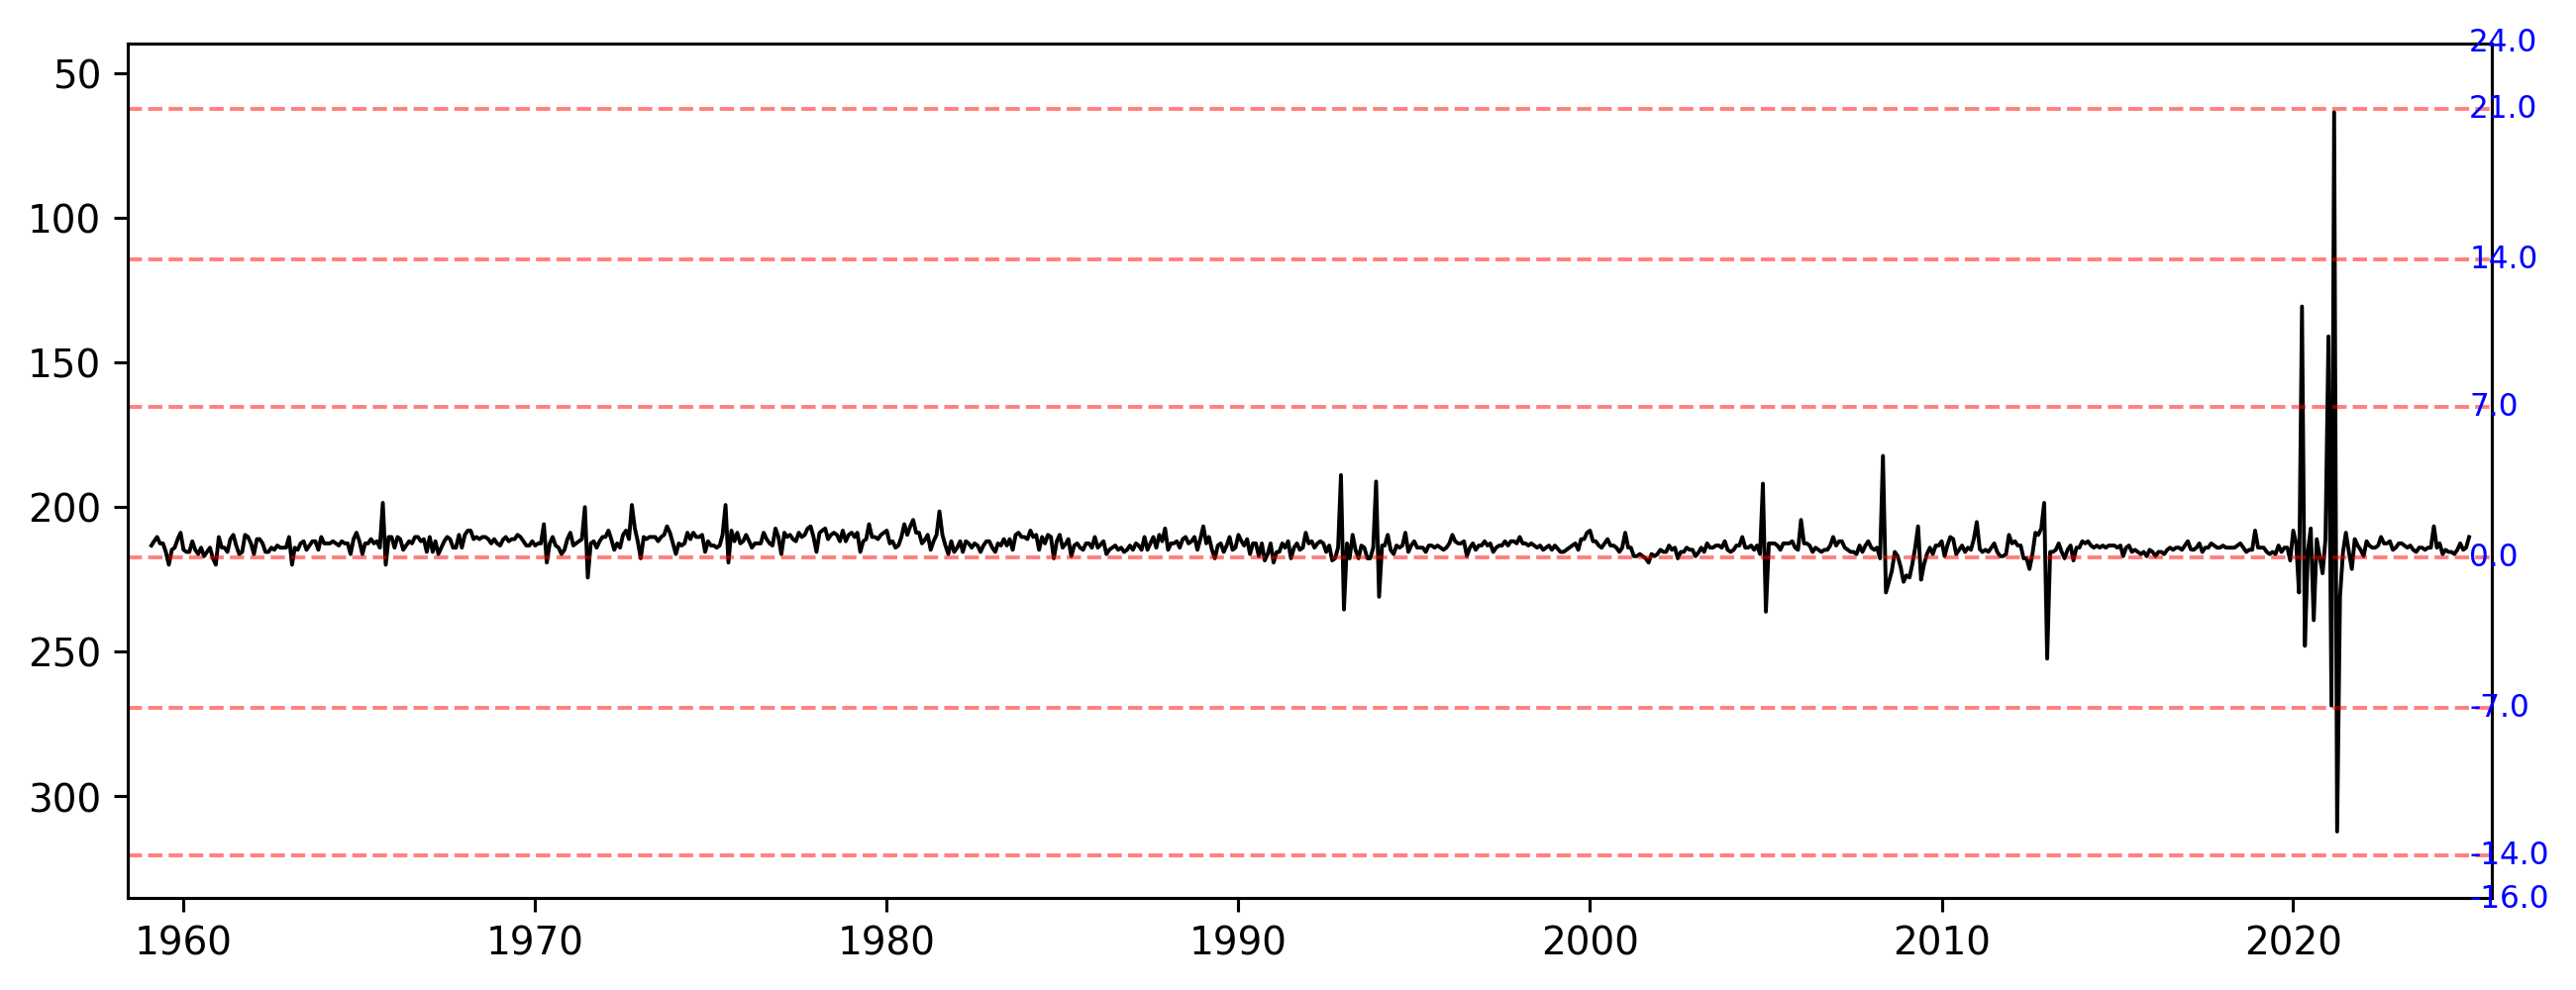

In [9]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.plot(scr.series, label = 'Unscaled series', lw = 1, c = 'black')
ax.set_ylim(scr.axis_limits["y_min"], scr.axis_limits["y_max"])
ax.margins(0.01, 0.02)
for px_pos, value in zip(scr.y_axis.index, scr.y_axis.values):
    ax.axhline(y=px_pos, color='r', linestyle='--', alpha=0.5, lw = 1)
    ax.text(max(scr.unscaled_series.index), px_pos, 
            f"{value}", va='center', ha='left', fontsize=8, color='b')

In [10]:
scr.scale_series()

INFO - Scale series method: Start value, end value: 0.5, 0.9, pix0, pix1: 213.3125, 210.3625, 
data units per chart pixel from start & end points: 0.13559322033898358, 
unit_per_pix calculated from the y axis ticks: 0.13458915338710736, 
unit_per_pix from axis limits and self.y_axis (probably best way): 0.13513513513513514
yaxis top tick: 24.0, yaxis bot tick: -16.0
axis_limits: 335.0, 40.0, y-axis series min & max pixel values: 335.5, 39.5


Unit per pix forumlation, 24.0, -16.0, 40.0, 296.0, 40.0, 335.0, 0.13513513513513514
Series crosses zero, x-axis should be at about pixel y-cordinate:  217.5


1959-02-01    0.511824
1959-03-01    0.711149
1959-04-01    0.910473
1959-05-01    0.611486
1959-06-01    0.611486
                ...   
2024-09-01    0.312500
2024-10-01    0.611486
2024-11-01    0.312500
2024-12-01    0.412162
2025-01-01    0.910473
Freq: MS, Name: personal income, Length: 792, dtype: float64

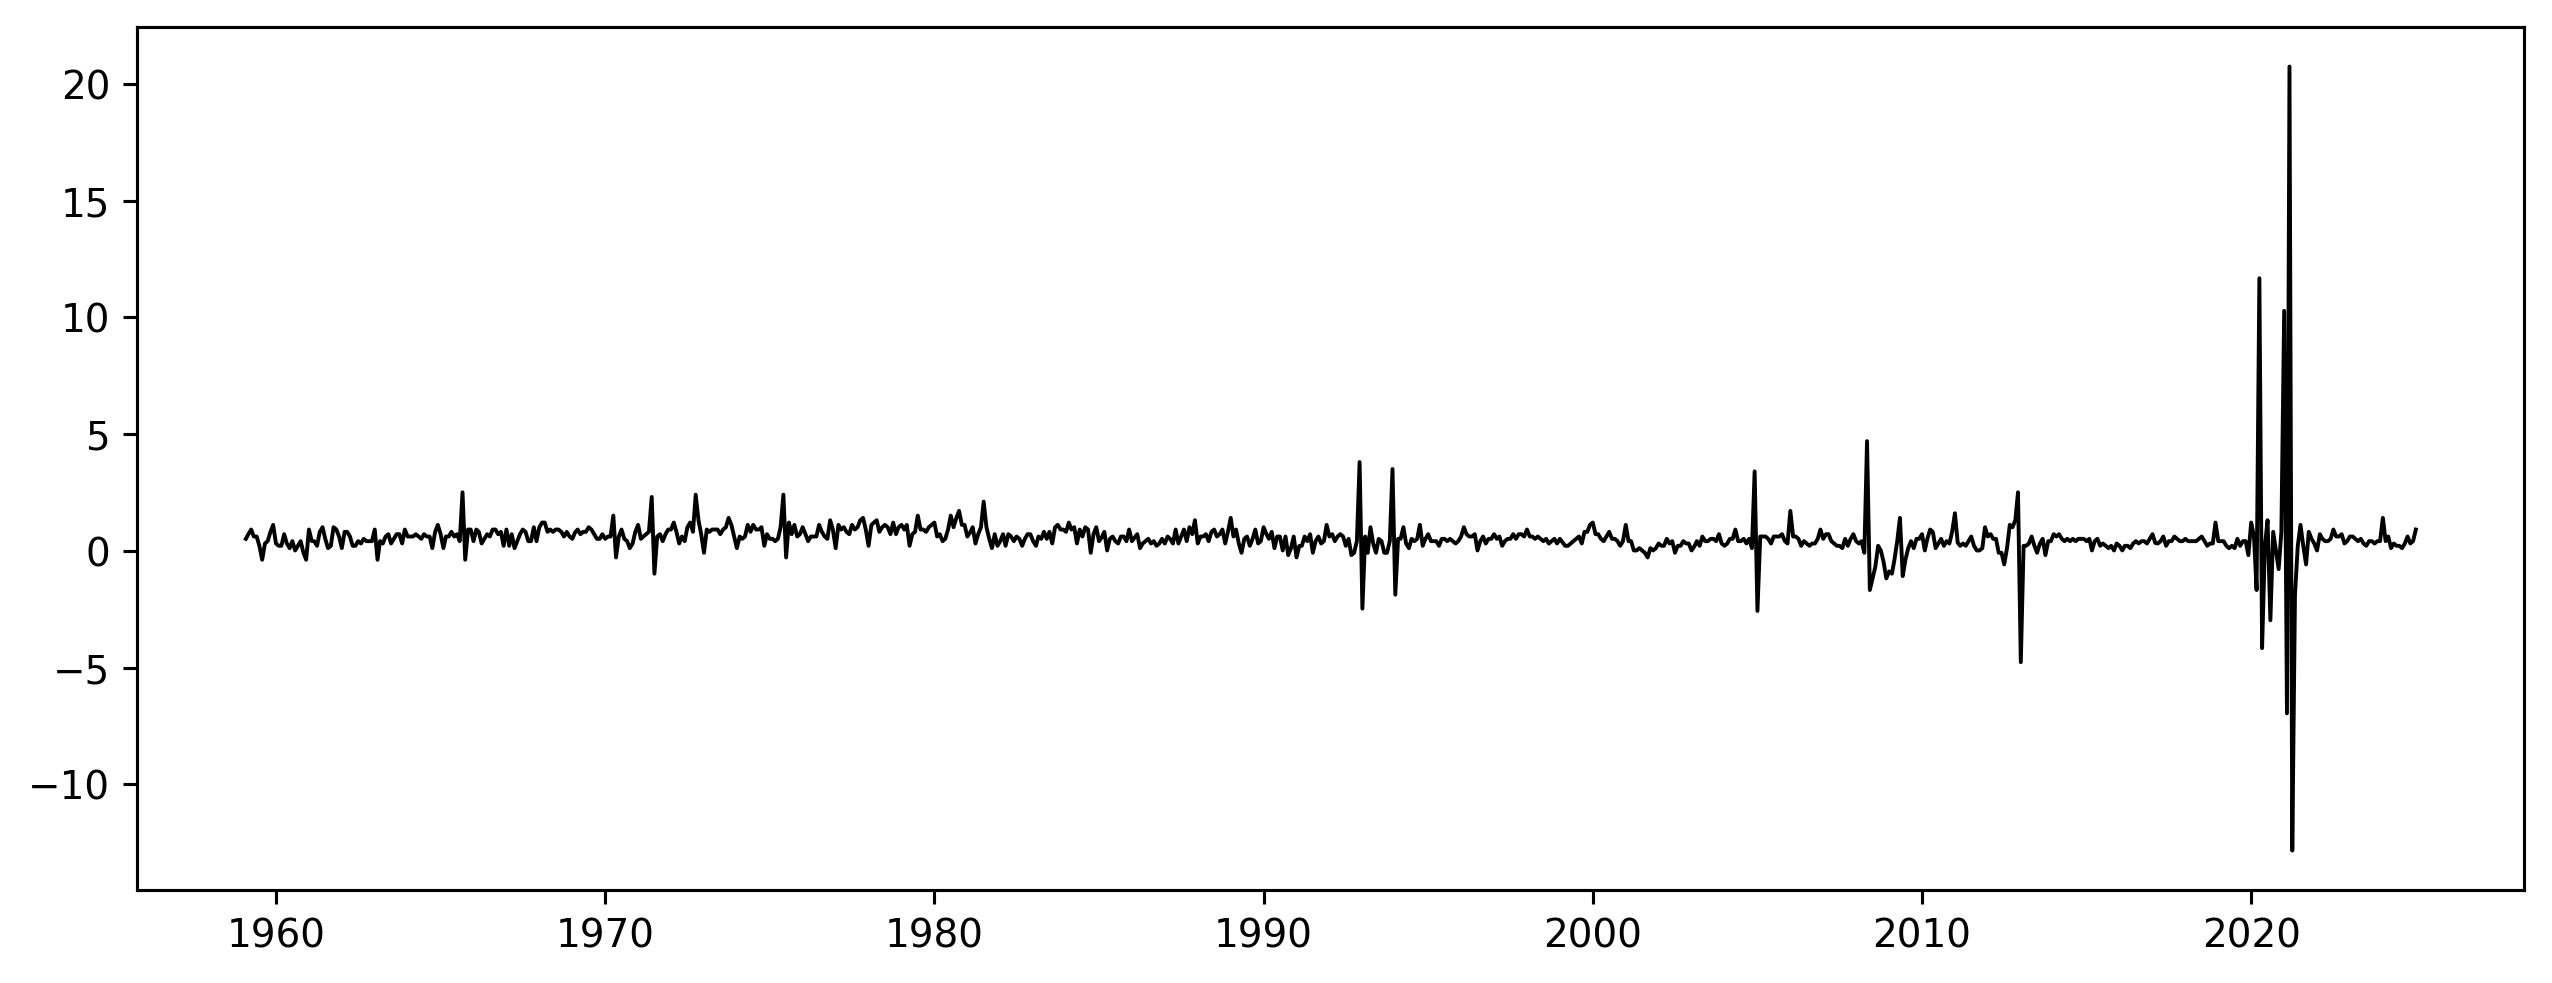

In [11]:
fig2, ax2 = plt.subplots()
ax2.plot(scr.series, label = 'Scaled_series', lw = 1, c = 'black')

In [5]:
examples = "12 k USD, 1200 B brazoReal, 1.2 G dollarz, 1.68 k Thousand USD, 1.68, ruffwons, 600 million dollars, 1.2 billion dollars, 1.2 trillion dollars, 1.2 quadrillion dollars, 6.73 %, 1 g %, 12.34 %, 30 thousand rupees"
examps = examples.split(", ")
for exam in examps:
    print(convert_metric_prefix(exam))
    

(12000.0, 'USD')
(1200000000000.0, 'brazoReal')
(1200000000.0, 'dollarz')
(1680.0, 'Thousand USD')
(1.68, '')
(nan, 'ruffwons')
(600000000.0, 'illion dollars')
(1200000000.0, 'illion dollars')
(1200000000000.0, 'rillion dollars')
(1.2, 'quadrillion dollars')
(6.73, '%')
(1000000000.0, '%')
(12.34, '%')
(30000000000000.0, 'housand rupees')
